# 5. Hyper Parameter의 잦은 변경을 적용하기 위해 변수를 사용
* cf) 재시작후 모두 실행하는 단축키 : ctl+m,r

## Hyper Parameter 세팅
미리 hyper parameter 를 변수로 빼두면 변경하기가 쉽다.<BR>
이 부분에 interact 를 적용해보는 것도 하나의 방법일 수 있다.<BR>
[2.AnalyticProcess/Interact.ipynb](https://github.com/Finfra/TensorflowStudyExample/blob/master/s2.5/2.AnalyticProcess/Interact.ipynb)<BR>
(변경 후 위의 cf 를 통해 전체를 재시작해주면 된다.)

In [ ]:
batch_size = 50
num_classes = 3
epochs = 200

## 모델

라이브러리 선언

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

데이터세팅

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data

# num_classes
y= keras.utils.to_categorical(iris.target, num_classes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

모델 설계

In [ ]:
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(4,)))
#num_classes
model.add(Dense(num_classes, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


모델의 function 설정

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## Hyper Parameter 변경점
위에서 미리 세팅한 변수들을 여기에 적용해서 위에서 바꿀때마다 세팅이 바뀐다.

In [ ]:
# batch_size,epochs
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Epoch 1/200
3/3 [==============================] - 3s 79ms/step - loss: 1.3393 - accuracy: 0.3048 - val_loss: 1.3266 - val_accuracy: 0.3333
Epoch 2/200
3/3 [==============================] - 0s 10ms/step - loss: 1.3096 - accuracy: 0.3048 - val_loss: 1.3008 - val_accuracy: 0.3333
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 1.2844 - accuracy: 0.2857 - val_loss: 1.2746 - val_accuracy: 0.3333
Epoch 4/200
3/3 [==============================] - 0s 9ms/step - loss: 1.2601 - accuracy: 0.2952 - val_loss: 1.2512 - val_accuracy: 0.3556
Epoch 5/200
3/3 [==============================] - 0s 10ms/step - loss: 1.2375 - accuracy: 0.2952 - val_loss: 1.2298 - val_accuracy: 0.2889
Epoch 6/200
3/3 [==============================] - 0s 11ms/step - loss: 1.2160 - accuracy: 0.2952 - val_loss: 1.2097 - val_accuracy: 0.2889
Epoch 7/200
3/3 [==============================] - 0s 21ms/step - loss: 1.1968 - accuracy: 0.2952 - val_loss: 1.1897 - val_accuracy: 0.2667
Epoch 8/200
3/3 [====

## 결과 확인

## training loss and acc ##


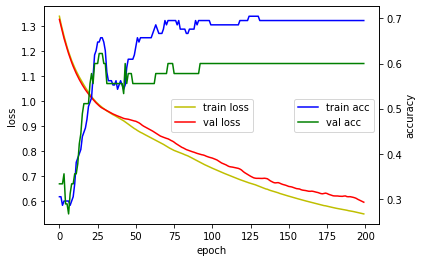

Test loss: 0.5943260788917542
Test accuracy: 0.6000000238418579


In [ ]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [ ]:
decoder = {k:v for k,v in enumerate( iris.target_names )}

In [ ]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'virginica',
 'virginica']

# 모델의 구조를 바꿔 보고 싶다. 